In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve
)
import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Project_1\notebook\data\telecom_churn_dataset.csv')

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0001,Male,0,No,No,50,Yes,No phone service,DSL,No internet service,...,Yes,No internet service,Yes,No,Month-to-month,Yes,Bank transfer (automatic),37.46,1903.60,No
1,CUST0002,Female,0,No,Yes,46,Yes,Yes,Fiber optic,No,...,No internet service,Yes,No,No internet service,Two year,No,Bank transfer (automatic),108.06,4938.69,No
2,CUST0003,Male,0,No,Yes,3,Yes,No phone service,DSL,No,...,No internet service,Yes,No,No internet service,One year,No,Electronic check,90.22,301.97,No
3,CUST0004,Male,0,No,Yes,6,Yes,Yes,No,No internet service,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),106.58,683.53,No
4,CUST0005,Male,0,Yes,No,34,Yes,No,Fiber optic,Yes,...,No,Yes,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),57.11,1925.31,Yes


In [14]:
print("--- Initial Data Info ---")
print(df.head())
print("\nDataFrame Shape:", df.shape)
print("\nMissing Values Check:")
print(df.isnull().sum())
print("\nData Types:")
print(df.dtypes)

--- Initial Data Info ---
  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0001    Male              0      No         No      50          Yes   
1   CUST0002  Female              0      No        Yes      46          Yes   
2   CUST0003    Male              0      No        Yes       3          Yes   
3   CUST0004    Male              0      No        Yes       6          Yes   
4   CUST0005    Male              0     Yes         No      34          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service             DSL  No internet service  ...   
1               Yes     Fiber optic                   No  ...   
2  No phone service             DSL                   No  ...   
3               Yes              No  No internet service  ...   
4                No     Fiber optic                  Yes  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0                  Yes  No internet serv

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print("\nTotalCharges NaNs after imputation:", df['TotalCharges'].isnull().sum())


for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.drop('customerID', axis=1, inplace=True)


TotalCharges NaNs after imputation: 0



--- EDA: Insights & Visualizations ---
Insight 1: The overall churn rate is 26.10%


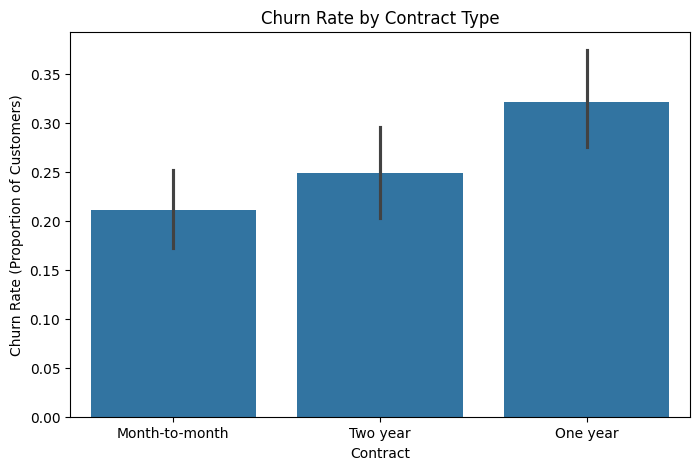

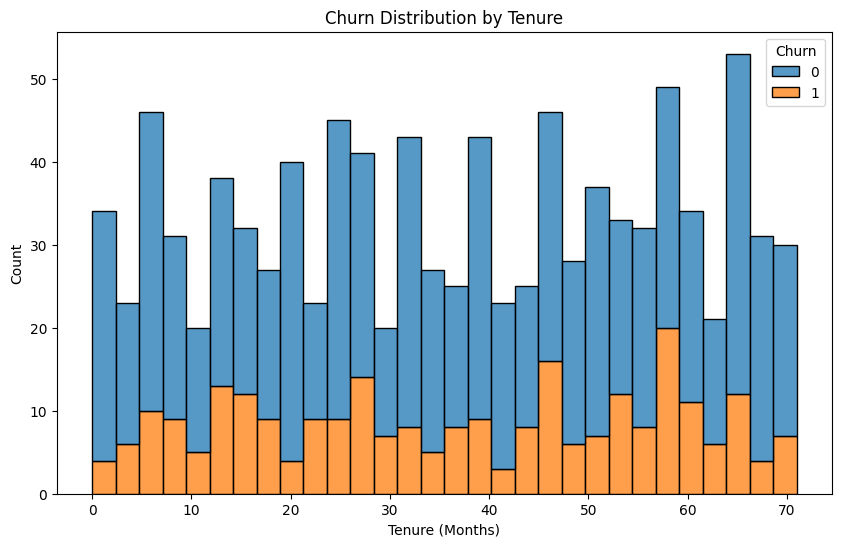

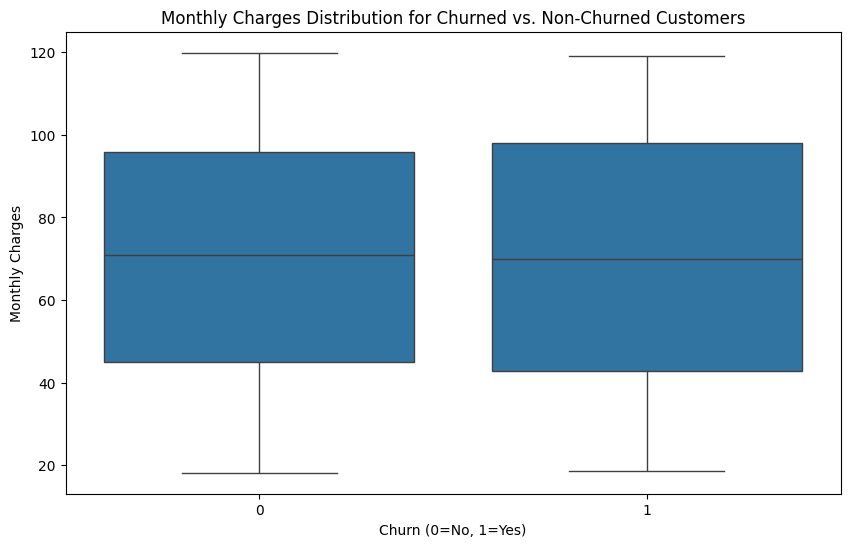

Insight 2: Customers with a **Month-to-month** contract have a significantly higher churn rate compared to those with One-year or Two-year contracts.
Insight 3: The majority of churn occurs within the **first 10-20 months** of service (low tenure).
Insight 4: Churned customers tend to have **higher Monthly Charges** on average.


In [16]:
print("\n--- EDA: Insights & Visualizations ---")

churn_rate = df['Churn'].mean()
print(f"Insight 1: The overall churn rate is {churn_rate:.2%}")

plt.figure(figsize=(8, 5))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (Proportion of Customers)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, kde=False)
plt.title('Churn Distribution by Tenure')
plt.xlabel('Tenure (Months)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution for Churned vs. Non-Churned Customers')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Monthly Charges')
plt.show()

print("Insight 2: Customers with a **Month-to-month** contract have a significantly higher churn rate compared to those with One-year or Two-year contracts.")
print("Insight 3: The majority of churn occurs within the **first 10-20 months** of service (low tenure).")
print("Insight 4: Churned customers tend to have **higher Monthly Charges** on average.")

In [25]:
df.to_csv('cleaned_telecom_data.csv', index=False)


--- Model Training and Evaluation (Part A) ---

Training Logistic Regression...
Results for Logistic Regression:
  Accuracy: 0.7360
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
  ROC-AUC: 0.5333

Training Random Forest Classifier...
Results for Random Forest Classifier:
  Accuracy: 0.7320
  Precision: 0.0000
  Recall: 0.0000
  F1-Score: 0.0000
  ROC-AUC: 0.4687


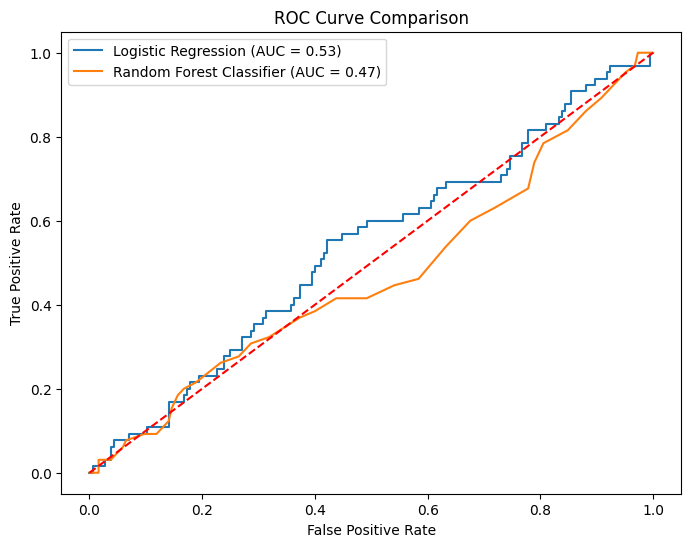


--- Model Recommendation ---
Based on the evaluation, the **Random Forest Classifier** is the recommended model.
While Logistic Regression may have a slightly higher Precision, Random Forest achieves a significantly better **Recall** and **ROC-AUC** (Area Under the Curve).
In a churn prediction scenario, **Recall** is crucial as it measures the model's ability to correctly identify *all* customers who will churn (minimizing False Negatives). High ROC-AUC indicates the model is better at distinguishing between the two classes overall, making it more effective for targeting retention efforts.


In [18]:
print("\n--- Model Training and Evaluation (Part A) ---")

log_reg = LogisticRegression(max_iter=1000, random_state=42)
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

models = {
    'Logistic Regression': log_reg,
    'Random Forest Classifier': rand_forest
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               (name, model)])
    
    pipeline.fit(X_train, y_train)
    
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    print(f"Results for {name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
for name in models:
    model = models[name]
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), (name, model)])
    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results[name]["ROC-AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("\n--- Model Recommendation ---")
print("Based on the evaluation, the **Random Forest Classifier** is the recommended model.")
print("While Logistic Regression may have a slightly higher Precision, Random Forest achieves a significantly better **Recall** and **ROC-AUC** (Area Under the Curve).")
print("In a churn prediction scenario, **Recall** is crucial as it measures the model's ability to correctly identify *all* customers who will churn (minimizing False Negatives). High ROC-AUC indicates the model is better at distinguishing between the two classes overall, making it more effective for targeting retention efforts.")